##ABOUT

The data is a structured dataset pull from the sapa.com database with a few important features that can be used to predict customer response to marketing campaigns. The data sample has been split into train and test with a volume of 1568 and 672.

#LOADING THE DATASETS: TRAIN, TEST AND SUBMISSION FILE


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Train (1).csv to Train (1) (1).csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Test (1).csv to Test (1) (1).csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving SampleSubmission (1).csv to SampleSubmission (1) (1).csv


#DATA EXPLORATION


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
train = pd.read_csv("Train (1).csv")
test = pd.read_csv("Test (1).csv")
ss = pd.read_csv("SampleSubmission (1).csv")
print(train.head())
print(train.shape)
print(train.info())
print(train.describe())

            ID  Year_of_Birth  ... Any_Complain Response
0  ID_4A9AR6FQ           1955  ...            0        0
1  ID_X28T3VEK           1958  ...            0        0
2  ID_AWXARH57           1962  ...            0        1
3  ID_FQVZHE81           1979  ...            0        0
4  ID_QVLWGPRN           1959  ...            0        0

[5 rows x 27 columns]
(1568, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1

In [6]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [6]:
ntrain = train.shape[0]
ntrain

1568

In [38]:
df = pd.concat((train, test)).reset_index(drop=True)

##Merging the training and test dataset together so as to clean the data one time


In [ ]:
df.shape

(2240, 27)

In [9]:
df.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0.0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0.0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1.0
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0.0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0.0


## FEATURE ENGINEERING

1. Converting the categorical features to numeric using get dummys
2. Filling missing values with the mean of the feature
3. Normalizaing the attributes to reduce biasness of the model



In [47]:
categorical_features = ['Education_Level', 'Marital_Status']
df = pd.get_dummies(df, columns = categorical_features)

In [39]:
df['Disposable_Income']= df['Disposable_Income'].fillna(df['Disposable_Income'].mean())

In [40]:
df= df.drop(['ID','Date_Customer'], axis=1)

In [41]:
df['Disposable_Income']=(df['Disposable_Income']-df['Disposable_Income'].mean())/df['Disposable_Income'].std()
df['Recency']=(df['Recency']-df['Recency'].mean())/df['Recency'].std()
df['Amount_on_Wines']=(df['Amount_on_Wines']-df['Amount_on_Wines'].mean())/df['Amount_on_Wines'].std()
df['Amount_on_Fruits']=(df['Amount_on_Fruits']-df['Amount_on_Fruits'].mean())/df['Amount_on_Fruits'].std()
df['Amount_on_MeatProducts']=(df['Amount_on_MeatProducts']-df['Amount_on_MeatProducts'].mean())/df['Amount_on_MeatProducts'].std()
df['Amount_on_FishProducts']=(df['Amount_on_FishProducts']-df['Amount_on_FishProducts'].mean())/df['Amount_on_FishProducts'].std()
df['Amount_on_GoldProds']=(df['Amount_on_GoldProds']-df['Amount_on_GoldProds'].mean())/df['Amount_on_GoldProds'].std()
df['WebVisitsMonth']=(df['WebVisitsMonth']-df['WebVisitsMonth'].mean())/df['WebVisitsMonth'].std()

In [42]:
df['StorePurchases']=(df['StorePurchases']-df['StorePurchases'].mean())/df['StorePurchases'].std()
df['Amount_on_SweetProducts']=(df['Amount_on_SweetProducts']-df['Amount_on_SweetProducts'].mean())/df['Amount_on_SweetProducts'].std()

df['WebPurchases']=(df['WebPurchases']-df['WebPurchases'].mean())/df['WebPurchases'].std()
df['Discounted_Purchases']=(df['Discounted_Purchases']-df['Discounted_Purchases'].mean())/df['Discounted_Purchases'].std()
df['CatalogPurchases']=(df['CatalogPurchases']-df['CatalogPurchases'].mean())/df['CatalogPurchases'].std()
df['Recency']=(df['Recency']-df['Recency'].mean())/df['Recency'].std()

#Seperating back to the train and test dataset of Data cleaning


In [48]:
train_df = df[:ntrain]
test_df = df[ntrain:]

In [49]:
X = train_df.drop(['Response'], axis = 1) # Features
y = train_df['Response']

## Feature Selection. 
using Random Forest classifier to get the most important Features to the target variable, "Response" .

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
#model.fit(X_train, Y_train)

In [50]:
X = train_df.drop(['Response'], axis = 1) # Features
y = train_df['Response']

Text(0.5, 1.0, 'Top Features derived by Random Forest')

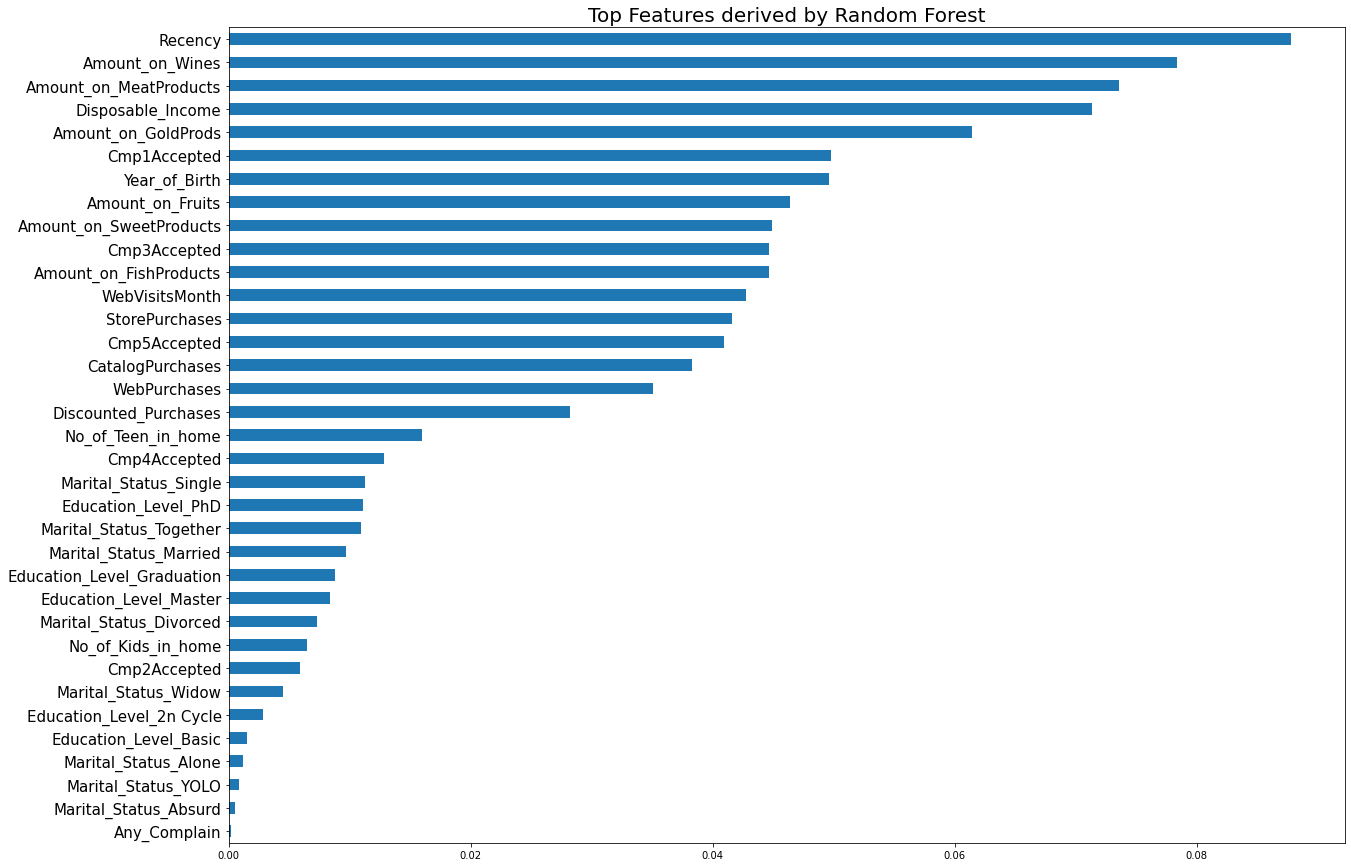

In [51]:
rfc = RandomForestClassifier(random_state=0, n_estimators=100)
model = rfc.fit(X, y)
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(47)  
   .plot(kind='barh', figsize=[20,15])
   .invert_yaxis())
plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

#Redefining the dataframe with the most important features

In [52]:
df=df[[ 'Recency','Disposable_Income','Amount_on_GoldProds','Year_of_Birth',
       'Amount_on_MeatProducts',  'Amount_on_Wines','WebVisitsMonth','Cmp1Accepted',
       
        'Cmp5Accepted','Amount_on_Fruits','Amount_on_SweetProducts','CatalogPurchases',
          'Amount_on_FishProducts','StorePurchases','WebPurchases','Cmp3Accepted','Discounted_Purchases',
           "Response"]]

In [53]:
train_df = df[:ntrain]
test_df = df[ntrain:]

In [54]:
X = train_df.drop(['Response'], axis = 1) # Features
y = train_df['Response']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify= y)

## using a train/test split of 70/30. While also checking if the dataset is balanced

In [ ]:
train['Response'].value_counts()

0    1329
1     239
Name: Response, dtype: int64

## Using SMOTE to balance the target class

In [55]:
from collections import Counter
#using SMOTE to upsample minority class
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('b/4 smote:',  counter)
smt= SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('after Smote:', counter)

b/4 smote: Counter({0.0: 930, 1.0: 167})
after Smote: Counter({0.0: 930, 1.0: 930})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



##MODELING

Importing required models and performance metrics

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [57]:
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
clf=classifier.fit(X_train_sm, y_train_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [59]:
l_pred=classifier.predict(X_test)

#Results for Logistics Regression

In [60]:
get_model_results(X_train_sm, y_train_sm, X_test, y_test, clf)

ROC Score:
0.8728244221665274

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88       399
         1.0       0.43      0.78      0.56        72

    accuracy                           0.81       471
   macro avg       0.69      0.80      0.72       471
weighted avg       0.87      0.81      0.83       471


Confusion Matrix:
[[326  73]
 [ 16  56]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [61]:
test_df= test_df.drop(['Response'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



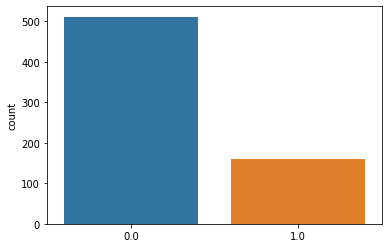

In [62]:
predictions = classifier.predict(test_df)
predictions = pd.Series(predictions)

# Create a submission file
sub_file = ss.copy()
sub_file.predictions = predictions

# Check the distribution of your predictions
sns.countplot(sub_file.predictions);

In [ ]:
sub_file.Response =predictions

In [ ]:
sub_file.head()

,ID,Response
0,ID_ZPMABNVX,0.0
1,ID_WFE91NAA,0.0
2,ID_JV11RBRK,0.0
3,ID_6B7SVKY9,0.0
4,ID_GOVUZ545,0.0


In [ ]:
from google.colab import files
sub_file.to_csv('sub_files.csv', index= False) 
files.download('sub_files.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
from xgboost import XGBClassifier

In [68]:
model = XGBClassifier()
clf= model.fit(X_train, y_train)

In [69]:
pred= model.predict(X_test)

## Results for XGBoost

In [70]:
get_model_results(X_train_sm, y_train_sm, X_test.values, y_test, clf)

ROC Score:
0.8648531049846839

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       399
         1.0       0.55      0.53      0.54        72

    accuracy                           0.86       471
   macro avg       0.73      0.73      0.73       471
weighted avg       0.86      0.86      0.86       471


Confusion Matrix:
[[368  31]
 [ 34  38]]


## Conclusion
The Project was about predicting customers reponse to a marketing compaign. The dataset was gotten from sapa.com database

After cleaning the dataset it was modeled with Logistic Regression and XBGoost classifier. Logistic regression return a result with 81% accurate predictions while XGboost had 86% accuracy.

